In [186]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [187]:
# %matplotlib inline

In [188]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [189]:
url = "https://www.formula1.com/en/results.html/2018/drivers/MAXVER01/max-verstappen.html"
html = urlopen(url)

In [190]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [191]:
title = soup.title
print(title)

<title>Standings</title>


In [192]:
rows = soup.find_all('tr')

In [193]:
list_rows = []
for row in rows:
    row_td = row.find_all('td')
    # print(row_td)
    list_rows.append(row_td)
list_rows = list_rows[1:]

In [207]:
races = []
for row in list_rows:
    str_cell = str(row)
    clean_str = BeautifulSoup(str_cell, 'lxml').get_text()
    races.append(clean_str)

In [208]:
df = pd.DataFrame(races)
df1 = df[0].str.split(',', expand = True)
df1.head(20)

,0,1,2,3,4,5,6
0,[,\nAustralia\n,25 Mar 2018,\nRed Bull Racing TAG Heuer\n,6,8,]
1,[,\nBahrain\n,08 Apr 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]
2,[,\nChina\n,15 Apr 2018,\nRed Bull Racing TAG Heuer\n,5,10,]
3,[,\nAzerbaijan\n,29 Apr 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]
4,[,\nSpain\n,13 May 2018,\nRed Bull Racing TAG Heuer\n,3,15,]
5,[,\nMonaco\n,27 May 2018,\nRed Bull Racing TAG Heuer\n,9,2,]
6,[,\nCanada\n,10 Jun 2018,\nRed Bull Racing TAG Heuer\n,3,15,]
7,[,\nFrance\n,24 Jun 2018,\nRed Bull Racing TAG Heuer\n,2,18,]
8,[,\nAustria\n,01 Jul 2018,\nRed Bull Racing TAG Heuer\n,1,25,]
9,[,\nGreat Britain\n,08 Jul 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]


In [196]:
labels = soup.find_all('th')
clean_lab = BeautifulSoup(str(labels), 'lxml').get_text()
header = []
header.append(clean_lab)
print(header)

['[, Grand Prix, Date, Car, Race Position, PTS, ]']


In [197]:
df2 = pd.DataFrame(header)
df2.head()

,0
0,"[, Grand Prix, Date, Car, Race Position, PTS, ]"


In [198]:
df3 = df2[0].str.split(',', expand = True)
df3.head()

,0,1,2,3,4,5,6
0,[,Grand Prix,Date,Car,Race Position,PTS,]


In [199]:
frames = [df3,df1]
df4= pd.concat(frames)
df4.head(20)

,0,1,2,3,4,5,6
0,[,Grand Prix,Date,Car,Race Position,PTS,]
0,[,\nAustralia\n,25 Mar 2018,\nRed Bull Racing TAG Heuer\n,6,8,]
1,[,\nBahrain\n,08 Apr 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]
2,[,\nChina\n,15 Apr 2018,\nRed Bull Racing TAG Heuer\n,5,10,]
3,[,\nAzerbaijan\n,29 Apr 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]
4,[,\nSpain\n,13 May 2018,\nRed Bull Racing TAG Heuer\n,3,15,]
5,[,\nMonaco\n,27 May 2018,\nRed Bull Racing TAG Heuer\n,9,2,]
6,[,\nCanada\n,10 Jun 2018,\nRed Bull Racing TAG Heuer\n,3,15,]
7,[,\nFrance\n,24 Jun 2018,\nRed Bull Racing TAG Heuer\n,2,18,]
8,[,\nAustria\n,01 Jul 2018,\nRed Bull Racing TAG Heuer\n,1,25,]


In [200]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[,Grand Prix,Date,Car,Race Position,PTS,]
0,[,Grand Prix,Date,Car,Race Position,PTS,]
0,[,\nAustralia\n,25 Mar 2018,\nRed Bull Racing TAG Heuer\n,6,8,]
1,[,\nBahrain\n,08 Apr 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]
2,[,\nChina\n,15 Apr 2018,\nRed Bull Racing TAG Heuer\n,5,10,]
3,[,\nAzerbaijan\n,29 Apr 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]


In [201]:
df5.reset_index(inplace = True, drop = True)
df5.head(20)

,[,Grand Prix,Date,Car,Race Position,PTS,]
0,[,Grand Prix,Date,Car,Race Position,PTS,]
1,[,\nAustralia\n,25 Mar 2018,\nRed Bull Racing TAG Heuer\n,6,8,]
2,[,\nBahrain\n,08 Apr 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]
3,[,\nChina\n,15 Apr 2018,\nRed Bull Racing TAG Heuer\n,5,10,]
4,[,\nAzerbaijan\n,29 Apr 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]
5,[,\nSpain\n,13 May 2018,\nRed Bull Racing TAG Heuer\n,3,15,]
6,[,\nMonaco\n,27 May 2018,\nRed Bull Racing TAG Heuer\n,9,2,]
7,[,\nCanada\n,10 Jun 2018,\nRed Bull Racing TAG Heuer\n,3,15,]
8,[,\nFrance\n,24 Jun 2018,\nRed Bull Racing TAG Heuer\n,2,18,]
9,[,\nAustria\n,01 Jul 2018,\nRed Bull Racing TAG Heuer\n,1,25,]


In [202]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
[                 18 non-null object
 Grand Prix       18 non-null object
 Date             18 non-null object
 Car              18 non-null object
 Race Position    18 non-null object
 PTS              18 non-null object
 ]                18 non-null object
dtypes: object(7)
memory usage: 1.1+ KB


(18, 7)

In [203]:
df6 = df5.drop(df5.index[0])
df6.head(20)

,[,Grand Prix,Date,Car,Race Position,PTS,]
1,[,\nAustralia\n,25 Mar 2018,\nRed Bull Racing TAG Heuer\n,6,8,]
2,[,\nBahrain\n,08 Apr 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]
3,[,\nChina\n,15 Apr 2018,\nRed Bull Racing TAG Heuer\n,5,10,]
4,[,\nAzerbaijan\n,29 Apr 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]
5,[,\nSpain\n,13 May 2018,\nRed Bull Racing TAG Heuer\n,3,15,]
6,[,\nMonaco\n,27 May 2018,\nRed Bull Racing TAG Heuer\n,9,2,]
7,[,\nCanada\n,10 Jun 2018,\nRed Bull Racing TAG Heuer\n,3,15,]
8,[,\nFrance\n,24 Jun 2018,\nRed Bull Racing TAG Heuer\n,2,18,]
9,[,\nAustria\n,01 Jul 2018,\nRed Bull Racing TAG Heuer\n,1,25,]
10,[,\nGreat Britain\n,08 Jul 2018,\nRed Bull Racing TAG Heuer\n,DNF,0,]


In [204]:
points = df6[' PTS']
type(points)
print(points)

1       8
2       0
3      10
4       0
5      15
6       2
7      15
8      18
9      25
10      0
11     12
12      0
13     15
14     10
15     18
16     10
17     15
Name:  PTS, dtype: object


In [205]:
plt.rcParams['figure.figsize'] = [11, 5]

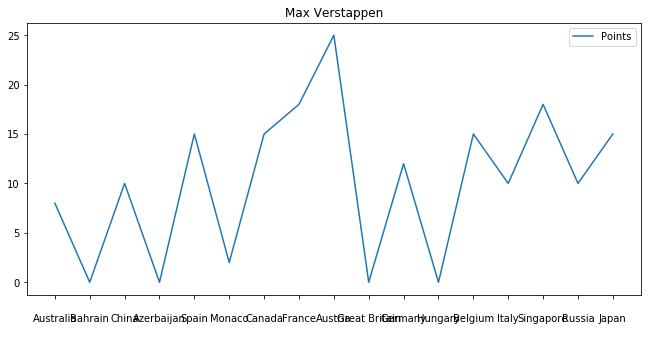

In [206]:
y = []
for i in points:
    y.append(int(i))
x = df6[' Grand Prix']
plt.plot(x, y, label = 'Points')
plt.title('Max Verstappen')
plt.legend()
plt.show()